In [5]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import string
import re

In [3]:
# Read in data
df = pd.read_csv("News_Snapshots/banking_snapshot_410.csv")
df.head(5)

,Unnamed: 0,date,summary
0,0,2023-03-17,Engadget Podcast: Why did Silicon Valley Bank ...
1,1,2023-03-13,US regulators will protect all deposits at Sil...
2,2,2023-03-11,USDC stablecoin breaks dollar peg following Si...
3,3,2023-03-13,SVB’s Collapse Is Causing Chaos in India’s Tec...
4,4,2023-03-15,Why Did Silicon Valley Bank and Signature Bank...


In [6]:
comment_words = ''
stopwords = set(STOPWORDS)

In [7]:
for row in df["summary"]:
    text = "".join([char.lower() for char in row if char not in string.punctuation])
    tokens = re.split('\W+', text)
    comment_words += " ".join(tokens)+" "
comment_words[0:50]

'engadget podcast why did silicon valley bank fail '

In [8]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

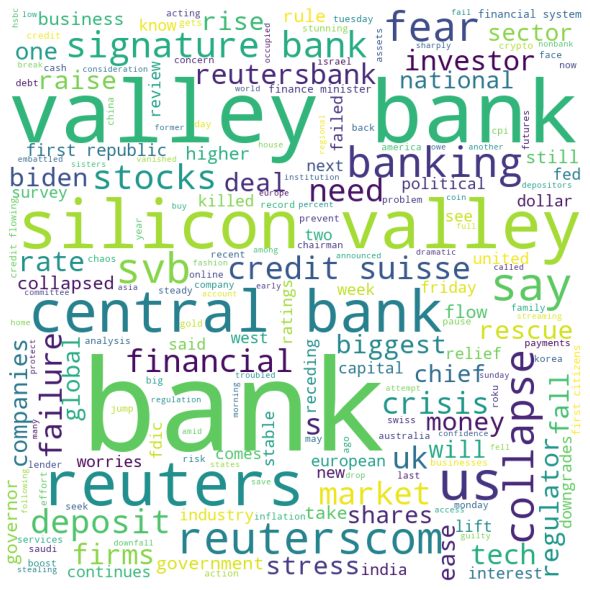

In [9]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()